In [ ]:
!pip install matplotlib

In [1]:
import syft as sy
%matplotlib inline
duet = sy.join_duet(loopback=True)

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!


/home/user-010/anaconda3/envs/pysyft/lib/python3.7/site-packages/aiortc/rtcdtlstransport.py:211: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  _openssl_assert(lib.SSL_CTX_use_certificate(ctx, self._cert._x509) == 1)  # type: ignore
/home/user-010/anaconda3/envs/pysyft/lib/python3.7/site-packages/aiortc/rtcdtlstransport.py:186: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  value=certificate_digest(self._cert._x509),  # type: ignore



♫♫♫ > CONNECTED!


In [2]:
class SyNet(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet, self).__init__(torch_ref=torch_ref)
        
        self.lin =self.torch_ref.nn.Linear(11,8)
    def forward(self, x):
        x = self.lin(x)
        return x

In [3]:
import torch
model1 = SyNet(torch)
model1_ptr = model1.send(duet)

In [4]:
opt1 = duet.torch.optim.Adam(params=model1_ptr.parameters(),lr=0.01)

In [5]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 6be98d20b1ff45c988d963ef7f9a43a4>,[dataset],Flow hydroponics system Independent featuresDA...,<class 'torch.Tensor'>


In [6]:
data_pointer = duet.store[0]

In [7]:
import numpy as np

In [8]:

model2 = torch.nn.Linear(8,11)
opt2 = torch.optim.Adam(params=model2.parameters(), lr=0.01)

target = torch.tensor([                     
                     [17.62,17.73,17.81,17.95,18.06,18.09,18.17,18.23,18.29,18.3,18.07],
                     [18.16,18.19,18.24,18.28,18.31,18.38,18.42,18.49,18.57,18.59,18.62],
                     [18.64,18.69,18.73,18.77,18.86,19.17,19.23,19.36,19.45,19.58,19.63],
                     [19.75,19.87,19.89,19.95,20.06,20.09,20.13,20.18,20.24,20.27,20.31],
                     [20.39,20.42,20.48,20.56,20.67,20.73,20.79,20.84,20.89,20.93,20.98],
                     [21.06,21.09,21.15,21.19,21.24,21.28,21.34,21.46,21.57,21.66,21.71],
                     [21.83,21.94,22.23,22.34,22.39,22.41,22.48,22.51,22.56,22.59,22.64],
                     [23.35,23.46,23.57,23.61,23.79,23.86,23.92,24.05,24.62,24.95,25.64]])
target.shape
#target.type

torch.Size([8, 11])

In [9]:
%%time
import matplotlib.pyplot as plt
#epoch = 200
losses = []
predictions = []
for iter in range(250):
    opt1.zero_grad()
    opt2.zero_grad()
    
    activation_ptr = model1_ptr(data_pointer)
    activation = activation_ptr.clone().get(request_block=True)
    
    pred = model2(activation)
    
    #target = target.detach().numpy()
    loss = ((pred - target)**2).sum()
   
    loss.backward()
    
    grad_ptr = activation.grad.clone().send(duet)
    activation_ptr.backward(grad_ptr)
    
    opt1.step()
    opt2.step()
    losses.append(loss.tolist())
    predictions.append(pred.tolist())
    
    print("losses: ",losses)
    print('Predictions =',pred)

losses:  [119862.921875]
Predictions = tensor([[ 1.1211e+01, -1.5588e+00, -1.9926e+00,  5.7545e+00,  1.3140e+00,
          5.3048e-01, -2.0679e+00, -3.0030e+00,  1.7074e-01,  6.2251e+00,
          3.1916e+00],
        [ 2.9126e+01, -3.0118e+01,  8.9966e+01,  1.1029e+02,  1.5812e+02,
          1.8559e+02,  1.2129e+02,  1.4463e+01, -1.0825e+02,  2.3544e+01,
         -1.0400e+01],
        [ 1.1710e+01, -1.7193e+00, -1.9189e+00,  6.2066e+00,  1.7843e+00,
          9.7008e-01, -1.8700e+00, -3.1279e+00, -4.8274e-02,  6.5586e+00,
          3.3123e+00],
        [ 1.1815e+01, -1.8081e+00, -1.8175e+00,  6.4480e+00,  2.1522e+00,
          1.3845e+00, -1.5477e+00, -3.1116e+00, -2.2319e-01,  6.5940e+00,
          3.3112e+00],
        [ 1.2117e+01, -1.8314e+00, -1.7892e+00,  6.6851e+00,  2.2386e+00,
          1.3649e+00, -1.6973e+00, -3.2846e+00, -3.0644e-01,  6.9423e+00,
          3.3467e+00],
        [ 1.2314e+01, -1.9526e+00, -1.7276e+00,  6.9296e+00,  2.6375e+00,
          1.8215e+00, -1.3510e+0

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875]
Predictions = tensor([[ 17.8814,   4.1761,   1.0576,   3.8547,   1.9921,   2.9796,  -2.7448,
           1.3618,   6.6963,   3.5638,  10.8175],
        [ 24.3217,  29.5521,  23.1524,  54.8988,  55.5831,  70.2505,  22.0056,
          39.9805, -35.4464,  33.0384,  17.7773],
        [ 18.5470,   4.3917,   1.1701,   4.0790,   2.5092,   3.5739,  -2.5877,
           1.4693,   6.9002,   3.7491,  11.4656],
        [ 18.5868,   4.4513,   1.1833,   4.1869,   2.8362,   3.9758,  -2.3207,
           1.5356,   6.8955,   3.7364,  11.6606],
        [ 19.1628,   4.6580,   1.3715,   4.3352,   3.0271,   4.1463,  -2.4491,
           1.5464,   7.0738,   3.9524,  12.0355],
        [ 19.2666,   4.7012,   1.3183,   4.4339,   3.3682,   4.5711,  -2.1681,
           1.6330,   7.1096,   3.9496,  12.3083],
        [ 19.4326,   5.6037,   0.0940,   4.7075,   2.5308,   3.2098,  -2.4805,
           2.271

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125]
Predictions = tensor([[18.8451, 10.1254,  6.7309,  3.2050,  7.2332,  9.1253,  2.6244,  3.6240,
         12.4680,  5.2438, 20.4413],
        [17.7772, 45.0660, 14.7265, 24.3327, 19.7260, 25.0984,  2.0491, 33.1866,
         10.0754, 36.6196, 38.6727],
        [19.3869, 10.6655,  7.0769,  3.2557,  7.9972, 10.0119,  3.0428,  3.7784,
         13.0465,  5.4626, 21.6530],
        [19.3059, 10.8189,  7.1017,  3.2523,  8.3447, 10.4388,  3.3463,  3.8298,
         13.1750,  5.4449, 22.0130],
        [19.8990, 11.2565,  7.5337,  3.3428,  8.7860, 10.9072,  3.4597,  3.8878,
         13.6068,  5.6693, 22.8002],
        [19.8599, 11.4070,  7.4838,  3.3210,  9.1321, 11.3367,  3.7727,  3.9736,
         13.7823,  5.6867, 23.2474],
        [19.8673, 12.3712,  6.2080,  3.5864,  8.

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875]
Predictions = tensor([[22.1141, 16.7349, 14.3246,  8.9267, 11.8811, 14.6899, 10.8232, 12.6174,
         17.4169, 10.0639, 22.7663],
        [14.9072, 41.3631, 28.4882, 17.1076, 16.7024, 17.4535, 16.4123, 28.8357,
         34.0445, 33.1275, 33.3693],
        [22.8036, 17.6274, 15.0762,  9.2361, 12.8677, 15.8442, 11.6822, 13.2761,
         18.3055, 10.5304, 24.1101],
        [22.7322, 17.8686, 15.1974,  9.2724, 13.2507, 16.3113, 12.0914, 13.4614,
         18.5357, 10.5793, 24.5094],
        [23.4802, 18.5763, 15.9533,  9.5952, 13.8929, 17.0283, 12.5573, 13.8910,
         19.1843, 10.9626, 25.3870],
        [23.4389, 18.8163, 16.0013,  9.6084, 14.2684, 

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625]
Predictions = tensor([[20.0002, 20.4927, 20.1720, 17.5098, 16.6076, 19.1813, 19.2129, 22.6724,
         19.1159, 18.7144, 18.6792],
        [ 8.2584, 27.7573, 30.8317, 18.6517, 19.3008, 16.4652, 27.2542, 21.3452,
         35.0453, 29.5646, 13.2940],
        [20.6117, 21.5975, 21.2626, 18.2996, 17.8474, 20.5715, 20.5518, 23.9315,
         20.1505, 19.6902, 19.8067],
        [20.5169, 21.8918, 21.4748, 18.4578, 18.2904, 21.0881, 21.0893, 24.2826,
         20.4419, 19.8852, 20.1510],
        [21.2159, 22.7603, 22.4875, 19.15

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125]
Predictions = tensor([[18.4363, 19.1227, 21.8659, 20.6005, 19.9474, 21.1932, 22.1651, 22.3012,
         18.4247, 22.2444, 17.3614],
        [15.1135, 14.4394, 23.4359, 16.2197, 18.1957, 13.2460, 25.6832,  8.9484,
         28.0609, 18.0162,  4.4797],
        [19.0313, 20.1522, 23.0624, 21.5838, 21.3799, 22.6998, 23.6844, 23.5374,
         19.4651, 23.4015, 18.4357],
        [18.9520, 20.4255, 23.3006, 21.7993,

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625]
Predictions = tensor([[19.1961, 17.2627, 20.1499, 20.2989, 20.9152, 20.9558, 21.4523, 19.4276,
         17.7628, 21.3279, 18.9567],
        [26.3708,  9.8046, 15.8770, 16.6541, 15.7365, 11.1694, 22.0583, 10.0076,
         23.6186, 10.4719,  7.8293],
        [19.8998, 18.1893, 21.2505, 21.2795, 22.

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531]
Predictions = tensor([[18.6418, 17.4310, 18.1913, 19.7569, 20.3788, 19.9521, 19.9738, 19.1104,
         17.7243, 20.4792, 20.1338],
        [26.0062, 11.6124, 15.2578, 18.8102, 16.6449, 13.5041, 20.7539, 1

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906]
Predictions = tensor([[18.2989, 18.6162, 17.6725, 19.5631, 19.4436, 18.9497, 18.4126, 19.4089,
         17.9457,

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422]
Predictions = 

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

losses:  [119862.921875, 96033.0, 77116.34375, 62308.33984375, 50851.578125, 42086.57421875, 35440.6875, 30415.1875, 26582.833984375, 23594.8515625, 21185.890625, 19165.830078125, 17400.833984375, 15795.99609375, 14285.486328125, 12827.515625, 11400.5546875, 9999.720703125, 8633.3115234375, 7319.33349609375, 6082.04931640625, 4948.5546875, 3945.27294921875, 3094.118896484375, 2408.559326171875, 1890.28564453125, 1527.60693359375, 1296.655029296875, 1165.7701416015625, 1101.926513671875, 1076.617431640625, 1069.0269775390625, 1066.21044921875, 1061.374267578125, 1051.5538330078125, 1035.5760498046875, 1012.654541015625, 981.6290893554688, 940.8126831054688, 888.463134765625, 823.7545166015625, 747.7326049804688, 663.6005859375, 576.1508178710938, 490.68218994140625, 411.9275207519531, 343.3221435546875, 286.712890625, 242.4412841796875, 209.67160034179688, 186.82032775878906, 171.95901489257812, 163.11578369140625, 158.45799255371094, 156.3839111328125, 155.5681610107422, 154.9897308349

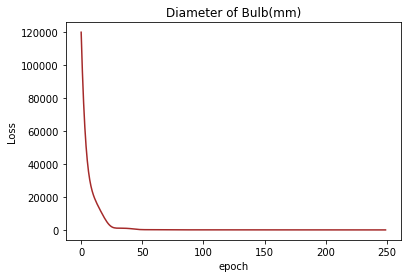

CPU times: user 99.1 ms, sys: 96.1 ms, total: 195 ms
Wall time: 73.3 ms


In [10]:
%%time
import matplotlib.pyplot as plt
#%matplotlib inline
#pred = pred.detach().numpy()
#pred = pred.numpy()
#loss = loss.detach().numpy()
# print("lost",losses)
# print("list",losses[0].tolist())
# print("pred", predictions[0].tolist())
# print("pred", predictions[0].ravel().tolist())
#model2 = model2.detach().numpy()
#target = target.detach().numpy()
plt.title('Diameter of Bulb(mm)')
plt.plot(losses,color='brown')
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()